Lab 7 Event selection optimization

In this lab, we will work with the high-pT LHC data.

Problem 1

Now we will try to plot histogram for mass feature in our data and evaluate expected significance without any event selection.

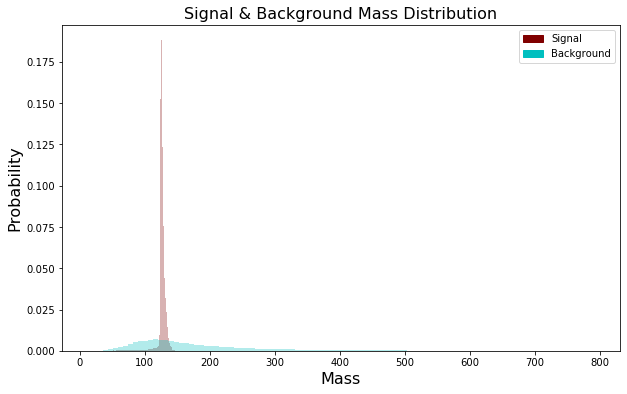

In [4]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats

infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile2)

plt.rcParams["figure.figsize"] = (10, 6)

plt.hist(higgs['mass'][:], 100, color = 'maroon', density=True, alpha=0.3) 
plt.hist(qcd['mass'][:], 100, color = 'c', density=True, alpha=0.3)
plt.xlabel('Mass', fontsize=16) 
plt.ylabel('Probability', fontsize=16) 
plt.title('Signal & Background Mass Distribution', fontsize=16)
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
plt.legend(handles=[maroon_patch, c_patch])

In order to evaluate the significance, we will use poisson distribution and survival function. In this part, we will try to calculate the significance of getting 50 signal data and 2000 background data. We first calculate the probability.

In [124]:
N_higgs = 50
N_qcd = 2000
prob = stats.poisson.sf(N_higgs + N_qcd,N_qcd)
sigma = stats.norm.isf(prob)
print("The significance calculated is", sigma)
com = N_higgs / np.sqrt(N_qcd)
print("The number of 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is", com)

The significance calculated is 1.1282230087754423
The number of 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is 1.118033988749895


By comparing these two numbers, given the same number of signal and background detected, we found that the significance we calculated through inverse survival function and survival function is very similar to the number we calculated by the given formula. The difference between them is smaller than 0.01. We can conclude that the given formula 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) can be used to estimate the significance to a great accuracy.

Problem 2

In this problem, we will try to identify the mass cuts in order to get the optimal expected significance. We will try different mass cuts and evaluate the expeced significance for each set of mass cuts. To achieve our goal, we will use the given formula 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) in problem 1 to find the significance values for different ranges of mass cuts we chose.

In [125]:
def mass_cuts (bottom, top):
    higgs_cut = 100000 - (len(higgs['mass'][bottom > higgs['mass']]) + len(higgs['mass'][top < higgs['mass']]))
    qcd_cut = 100000 - (len(qcd['mass'][bottom > qcd['mass']]) + len(qcd['mass'][top < qcd['mass']]))
    higgsratio = higgs_cut / len(higgs['mass'])
    qcdratio = qcd_cut / len(qcd['mass'])
    N_higgs = 50 * higgsratio
    N_qcd = 2000 * qcdratio
    sig = stats.norm.isf(stats.poisson.sf(N_higgs + N_qcd,N_qcd))
    return sig

In [126]:
for i in range(130):
    sig = mass_cuts(i, 130)
    print([sig, i,130])

[1.4066910028815793, 0, 130]
[1.4066910028815793, 1, 130]
[1.4066910028815793, 2, 130]
[1.4066910028815793, 3, 130]
[1.4066910028815793, 4, 130]
[1.4066910028815793, 5, 130]
[1.4066910028815793, 6, 130]
[1.4066910028815793, 7, 130]
[1.4066910028815793, 8, 130]
[1.4066910028815793, 9, 130]
[1.4066910028815793, 10, 130]
[1.4066910028815793, 11, 130]
[1.407409945540205, 12, 130]
[1.407409945540205, 13, 130]
[1.407409945540205, 14, 130]
[1.407409945540205, 15, 130]
[1.407409945540205, 16, 130]
[1.407409945540205, 17, 130]
[1.407409945540205, 18, 130]
[1.4081289004320352, 19, 130]
[1.4081289004320352, 20, 130]
[1.4081289004320352, 21, 130]
[1.4088478675576204, 22, 130]
[1.4110048423423116, 23, 130]
[1.4110048423423116, 24, 130]
[1.4153191222965358, 25, 130]
[1.4189146921647795, 26, 130]
[1.4196338428620336, 27, 130]
[1.4239490041566367, 28, 130]
[1.42898391619023, 29, 130]
[1.4018163351957391, 30, 130]
[1.4082905608762946, 31, 130]
[1.4169244062035247, 32, 130]
[1.432757709799768, 33, 130]


From the above results, we can see that for different mass cuts from 0 to 130 the significance increases first and then reach the peak point and starts decreasing. The peak value of siginificance we found is at mass cut from 124 to 130, and it is about 3.99, which is also much greater than the expected siginificance we found in problem 1.

Problem 3

For this problem, we will plot a stacked histogram of different features in our datasets and try if we can find another feature as discriminative as mass feature and identify additional feature to further imrpove expected signifiance.

SET A

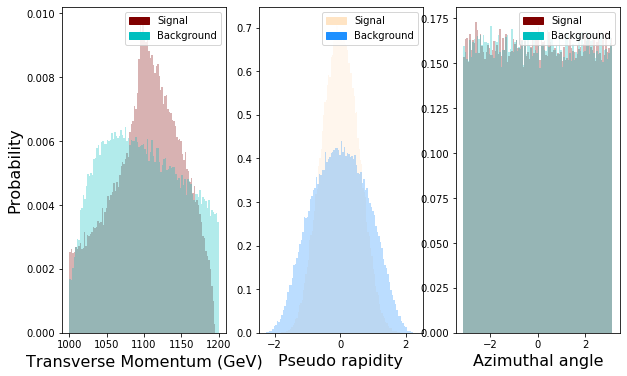

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(higgs['pt'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(qcd['pt'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('Transverse Momentum (GeV)', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(higgs['eta'][:], 100, color = 'bisque', density=True, alpha=0.3) 
ax2.hist(qcd['eta'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('Pseudo rapidity', fontsize=16) 
sig_patch = mpatches.Patch(color='bisque', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(higgs['phi'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(qcd['phi'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('Azimuthal angle', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

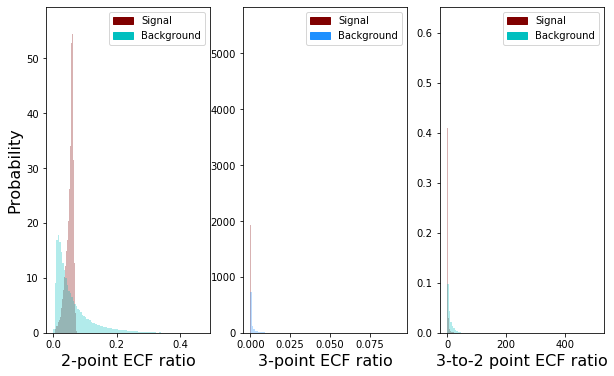

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(higgs['ee2'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(qcd['ee2'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('2-point ECF ratio', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(higgs['ee3'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax2.hist(qcd['ee3'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('3-point ECF ratio', fontsize=16) 
sig_patch = mpatches.Patch(color='maroon', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(higgs['d2'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(qcd['d2'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('3-to-2 point ECF ratio', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

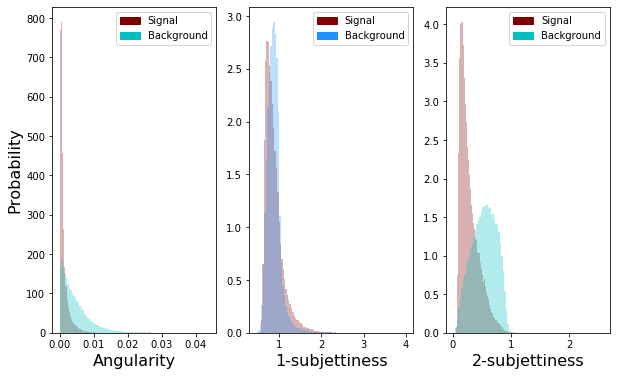

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(higgs['angularity'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(qcd['angularity'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('Angularity', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(higgs['t1'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax2.hist(qcd['t1'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('1-subjettiness', fontsize=16) 
sig_patch = mpatches.Patch(color='maroon', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(higgs['t2'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(qcd['t2'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('2-subjettiness', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

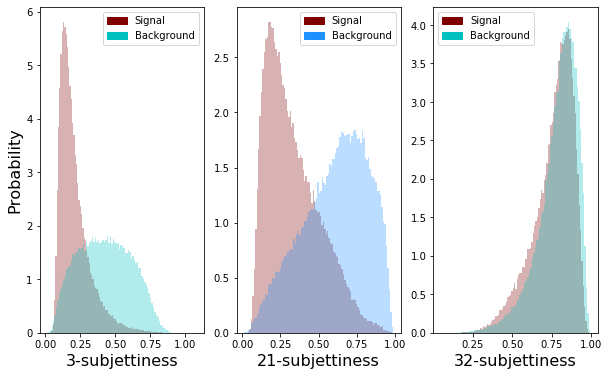

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(higgs['t3'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(qcd['t3'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('3-subjettiness', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(higgs['t21'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax2.hist(qcd['t21'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('21-subjettiness', fontsize=16) 
sig_patch = mpatches.Patch(color='maroon', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(higgs['t32'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(qcd['t32'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('32-subjettiness', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

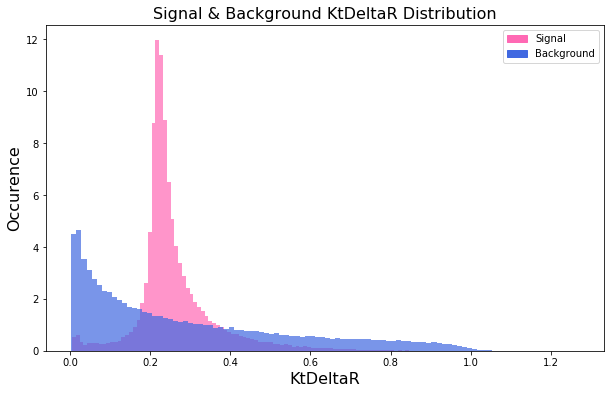

In [131]:
plt.hist(higgs['KtDeltaR'][:], 100, color = 'hotpink', density=True, alpha=0.7) 
plt.hist(qcd['KtDeltaR'][:], 100, color = 'royalblue', density=True, alpha=0.7)
plt.xlabel('KtDeltaR', fontsize=16) 
plt.ylabel('Occurence', fontsize=16) 
plt.title('Signal & Background KtDeltaR Distribution', fontsize=16)
sig_patch = mpatches.Patch(color='hotpink', label='Signal')
bcg_patch = mpatches.Patch(color='royalblue', label='Background')
plt.legend(handles=[sig_patch, bcg_patch])

From the above graphs, we can see that there are definitely some other features that could be as descriminative as the masss feature since there are features graphs that are well divided between background and signal.

SET B

Now we will try to plot these features with the optimal mass cuts.

In [132]:
masscut_higgs = higgs[(higgs['mass'] < 130) & (higgs['mass'] > 124)]
masscut_qcd = qcd[(qcd['mass'] < 130) & (qcd['mass'] > 124)]

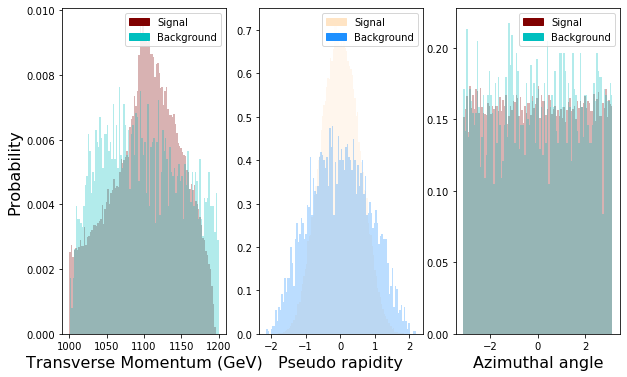

In [133]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(masscut_higgs['pt'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(masscut_qcd['pt'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('Transverse Momentum (GeV)', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(masscut_higgs['eta'][:], 100, color = 'bisque', density=True, alpha=0.3) 
ax2.hist(masscut_qcd['eta'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('Pseudo rapidity', fontsize=16) 
sig_patch = mpatches.Patch(color='bisque', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(masscut_higgs['phi'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(masscut_qcd['phi'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('Azimuthal angle', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

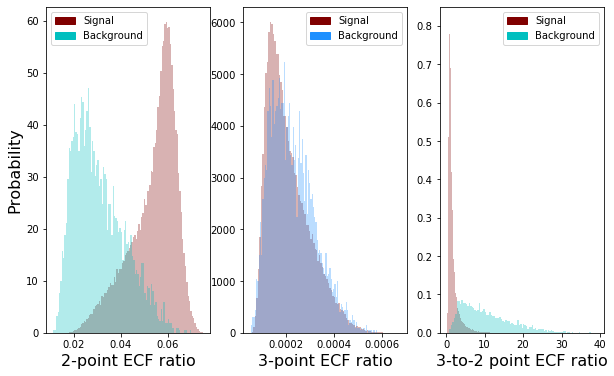

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(masscut_higgs['ee2'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(masscut_qcd['ee2'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('2-point ECF ratio', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(masscut_higgs['ee3'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax2.hist(masscut_qcd['ee3'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('3-point ECF ratio', fontsize=16) 
sig_patch = mpatches.Patch(color='maroon', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(masscut_higgs['d2'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(masscut_qcd['d2'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('3-to-2 point ECF ratio', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

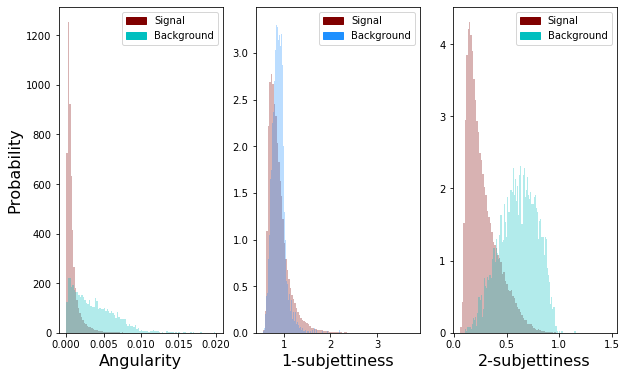

In [135]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(masscut_higgs['angularity'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(masscut_qcd['angularity'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('Angularity', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(masscut_higgs['t1'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax2.hist(masscut_qcd['t1'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('1-subjettiness', fontsize=16) 
sig_patch = mpatches.Patch(color='maroon', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(masscut_higgs['t2'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(masscut_qcd['t2'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('2-subjettiness', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

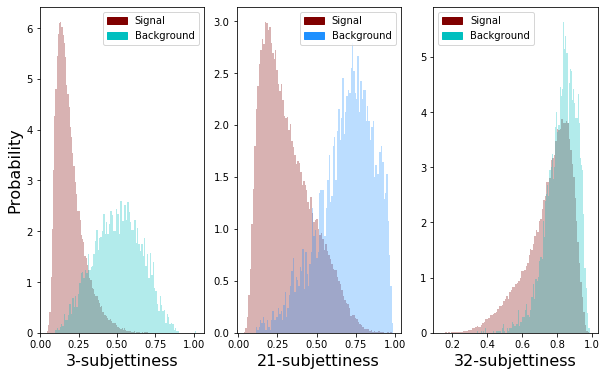

In [136]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(masscut_higgs['t3'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax1.hist(masscut_qcd['t3'][:], 100, color = 'c', density=True, alpha=0.3)
ax1.set_xlabel('3-subjettiness', fontsize=16) 
ax1.set_ylabel('Probability', fontsize=16) 
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax1.legend(handles=[maroon_patch, c_patch])

ax2.hist(masscut_higgs['t21'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax2.hist(masscut_qcd['t21'][:], 100, color = 'dodgerblue', density=True, alpha=0.3)
ax2.set_xlabel('21-subjettiness', fontsize=16) 
sig_patch = mpatches.Patch(color='maroon', label='Signal')
bcg_patch = mpatches.Patch(color='dodgerblue', label='Background')
ax2.legend(handles=[sig_patch, bcg_patch])

ax3.hist(masscut_higgs['t32'][:], 100, color = 'maroon', density=True, alpha=0.3) 
ax3.hist(masscut_qcd['t32'][:], 100, color = 'c', density=True, alpha=0.3)
ax3.set_xlabel('32-subjettiness', fontsize=16)  
maroon_patch = mpatches.Patch(color='maroon', label='Signal')
c_patch = mpatches.Patch(color='c', label='Background')
ax3.legend(handles=[maroon_patch, c_patch])

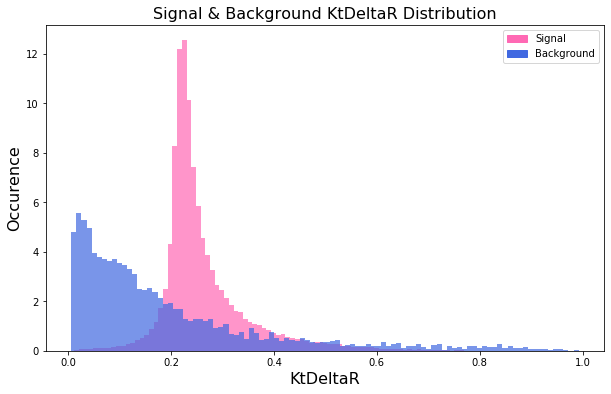

In [137]:
plt.hist(masscut_higgs['KtDeltaR'][:], 100, color = 'hotpink', density=True, alpha=0.7) 
plt.hist(masscut_qcd['KtDeltaR'][:], 100, color = 'royalblue', density=True, alpha=0.7)
plt.xlabel('KtDeltaR', fontsize=16) 
plt.ylabel('Occurence', fontsize=16) 
plt.title('Signal & Background KtDeltaR Distribution', fontsize=16)
sig_patch = mpatches.Patch(color='hotpink', label='Signal')
bcg_patch = mpatches.Patch(color='royalblue', label='Background')
plt.legend(handles=[sig_patch, bcg_patch])

After plotting with the optimal cut, we can still see that some of the features are still descriminative, therefore, the expected siginificance can be further improved.

Problem 4

In this problem, we will find a set of feature cuts which can help you to achieve the best significance. From the above graphs, we can see features d2 and ee2 are good for further feature cuts. Therefore, we will use these two features and the same method to achieve the best significance.

In [138]:
def ee2_cuts (bottom, top):
    higgs_cut = 100000 - (len(higgs['ee2'][bottom > higgs['ee2']]) + len(higgs['ee2'][top < higgs['ee2']]))
    qcd_cut = 100000 - (len(qcd['ee2'][bottom > qcd['ee2']]) + len(qcd['ee2'][top < qcd['ee2']]))
    higgsratio = higgs_cut / len(higgs['ee2'])
    qcdratio = qcd_cut / len(qcd['ee2'])
    N_higgs = 50 * higgsratio
    N_qcd = 2000 * qcdratio
    sig = stats.norm.isf(stats.poisson.sf(N_higgs + N_qcd,N_qcd))
    return sig

In [174]:
print(ee2_cuts(0.04, 0.07))
print(ee2_cuts(0.05, 0.07))
print(ee2_cuts(0.0497, 0.0669))

1.979413387147597
2.0682759424738753
2.140607944020572


In [175]:
def d2_cuts (bottom, top):
    higgs_cut = 100000 - (len(higgs['d2'][bottom > higgs['d2']]) + len(higgs['d2'][top < higgs['d2']]))
    qcd_cut = 100000 - (len(qcd['d2'][bottom > qcd['d2']]) + len(qcd['d2'][top < qcd['d2']]))
    higgsratio = higgs_cut / len(higgs['d2'])
    qcdratio = qcd_cut / len(qcd['d2'])
    N_higgs = 50 * higgsratio
    N_qcd = 2000 * qcdratio
    sig = stats.norm.isf(stats.poisson.sf(N_higgs + N_qcd,N_qcd))
    return sig

In [199]:
print(d2_cuts(0, 10))
print(d2_cuts(0, 5))
print(d2_cuts(0.5, 2))

1.2964695566006892
1.4891485560717048
1.8944720104120483


After different cuts, we see that the best significance for 2-Point ECF ratio is 2.14 with a range of 0.0497 to 0.0669, and for 3-to-2-Point ECF ratio, the best significance is in the range 0.5 to 2 with a value of 1.894.